Import relevant packages here.

In [2]:
#Import libarys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [3]:
#Import CSV file
data = pd.read_csv('cf_data.csv')

#Print the first 5 rows of the data set.
print("Head (first 5 rows) of the data set:")
print(data.head())

#Print the last 5 rows of the data set.
print("\nTail (last 5 rows) of the data set:")
print(data.tail())



Head (first 5 rows) of the data set:
         dv        s         a
0 -0.743240  53.5427  1.242570
1 -0.557230  53.6120  1.777920
2 -0.454769  53.6541  0.544107
3 -0.525396  53.7030 -0.294755
4 -0.601285  53.7592 -0.290961

Tail (last 5 rows) of the data set:
            dv        s         a
73903  5.19874  116.139 -0.795081
73904  5.10428  115.627 -0.314263
73905  5.13764  115.118  0.232283
73906  5.15348  114.599  0.262078
73907  5.25868  113.112 -0.612440


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [4]:
#Introduce the graph dataset
dv = np.linspace( -10 , 10 , 41)
s  = np.linspace( 0 , 200 , 21)
a = np.zeros(( len(s) , len(dv) ))
print(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [6]:
#Format the initial data
DV = data.dv.to_numpy()
S = data.s.to_numpy()
A = data.a.to_numpy()

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [9]:
#Constants
upsilon = 1.5  #[m/s]
sigma = 30  #[m]

#Loop trhough the graph in dv and s directions
for dv_index in range(len(dv)):
    for s_index in range(len(s)):
        
        #Introduce variables to calculate a on point (s,dv)
        nominator = 0
        divider = 0

        #Loop trhough the dataset and calculate nominator and divider for the a value at (s,dv)
        for list_index in range(len(DV)):
            omega = math.exp(-abs(dv[dv_index]-DV[list_index])/upsilon - abs(s[s_index]-S[list_index])/sigma)
            nominator += omega * A[list_index]
            divider += omega
        
        #Give an error if the divider is 0
        if divider == 0:
            print("Error: Divider is 0 at s = {s_index} , dv = {dv_index}")
            continue

        #calculate a at (s,dv) and update the graph set
        a_calc = nominator / divider
        print(f"at {dv[dv_index]} and {s[s_index]} a is {a_calc}")
        a[s_index,dv_index] = a_calc

at -10.0 and 0.0 a is 0.528790290747477
at -10.0 and 10.0 a is 0.5315283748955573
at -10.0 and 20.0 a is 0.5610065116703125
at -10.0 and 30.0 a is 0.6190215259190217
at -10.0 and 40.0 a is 0.6559602878761577
at -10.0 and 50.0 a is 0.6653967014867344
at -10.0 and 60.0 a is 0.6432296051271621
at -10.0 and 70.0 a is 0.6105526310808121
at -10.0 and 80.0 a is 0.5474711544941104
at -10.0 and 90.0 a is 0.4819634971019143
at -10.0 and 100.0 a is 0.4052463376125209
at -10.0 and 110.0 a is 0.32539861884231197
at -10.0 and 120.0 a is 0.25523852484334725
at -10.0 and 130.0 a is 0.18034444745593567
at -10.0 and 140.0 a is 0.12592130030376297
at -10.0 and 150.0 a is 0.041226547621746885
at -10.0 and 160.0 a is -0.061227540939783165
at -10.0 and 170.0 a is -0.17091023936506258
at -10.0 and 180.0 a is -0.25525303797028176
at -10.0 and 190.0 a is -0.3002739973659616
at -10.0 and 200.0 a is -0.23576588460685455
at -9.5 and 0.0 a is 0.5219729611174619
at -9.5 and 10.0 a is 0.5247241370156385
at -9.5 and 

The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

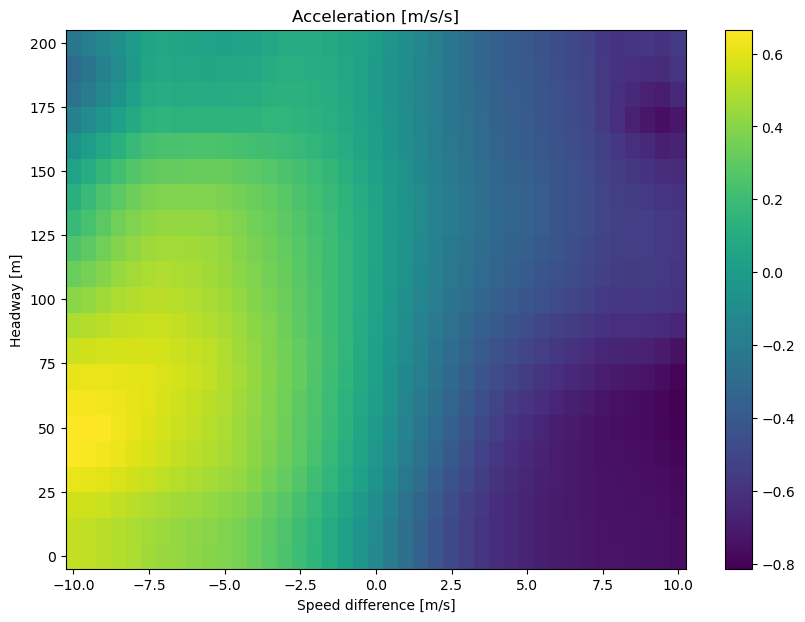

In [10]:
#Plot the outcome
X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a, shading='nearest')
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)
